<a href="https://colab.research.google.com/github/ChanceDurr/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module1-linear-algebra-review/Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1 - Scalars and Vectors

For the questions below it is not sufficient to simply provide answer to the questions, but you must solve the problems and show your work using python (the NumPy library will help a lot!) Translate the vectors and matrices into their appropriate python  representations and use numpy or functions that you write yourself to demonstrate the result or property. 

## 1.1 Create a two-dimensional vector and plot it on a graph

In [0]:
import matplotlib.pyplot as plt
import numpy as np

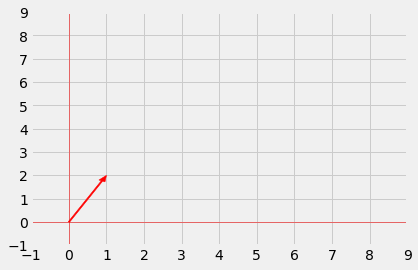

In [0]:
vector1 = np.array([1, 2])

plt.style.use('fivethirtyeight')
plt.arrow(0, 0, dx = vector1[0], dy = vector1[1],
          width=.04,
          length_includes_head=True,
          head_width=.18,
          color='r')

plt.xticks(range(-1, 10))
plt.yticks(range(-1, 10))
plt.axhline(y=0, color='r', linewidth=.5)
plt.axvline(x=0, color='r', linewidth=.5);

## 1.2 Create a three-dimensional vecor and plot it on a graph

In [0]:
from mpl_toolkits.mplot3d import Axes3D

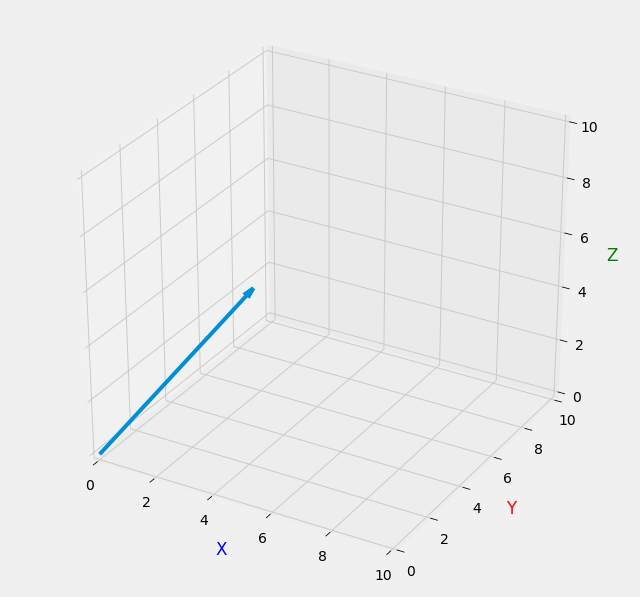

In [0]:
vector3D = np.array([3, 4, 5])
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, vector3D[0], vector3D[1], vector3D[2], arrow_length_ratio=.05)
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
ax.set_zlim([0, 10])
ax.set_xlabel('X', labelpad=10, color='b')
ax.set_ylabel('Y', labelpad=10, color='r')
ax.set_zlabel('Z', labelpad=10, color='g')
plt.show()

## 1.3 Scale the vectors you created in 1.1 by $5$, $\pi$, and $-e$ and plot all four vectors (original + 3 scaled vectors) on a graph. What do you notice about these vectors? 

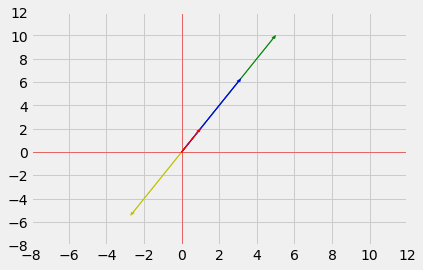

In [0]:
vector2 = vector1 * 5
vector3 = vector1 * np.pi
vector4 = vector1 * -(np.exp(1))

plt.style.use('fivethirtyeight')

plt.arrow(0, 0, dx = vector2[0], dy = vector2[1],
          width=.04,
          length_includes_head=True,
          head_width=.18,
          color='g')

plt.arrow(0, 0, dx = vector4[0], dy = vector4[1],
          width=.04,
          length_includes_head=True,
          head_width=.18,
          color='y')

plt.arrow(0, 0, dx = vector3[0], dy = vector3[1],
          width=.04,
          length_includes_head=True,
          head_width=.18,
          color='b')


plt.arrow(0, 0, dx = vector1[0], dy = vector1[1],
          width=.04,
          length_includes_head=True,
          head_width=.18,
          color='r')

plt.xticks(range(-8, 13, 2))
plt.yticks(range(-8, 13, 2))
plt.axhline(y=0, color='r', linewidth=.5)
plt.axvline(x=0, color='r', linewidth=.5);

## 1.4 Graph vectors $\vec{a}$ and $\vec{b}$ and plot them on a graph

\begin{align}
\vec{a} = \begin{bmatrix} 5 \\ 7 \end{bmatrix}
\qquad
\vec{b} = \begin{bmatrix} 3 \\4 \end{bmatrix}
\end{align}

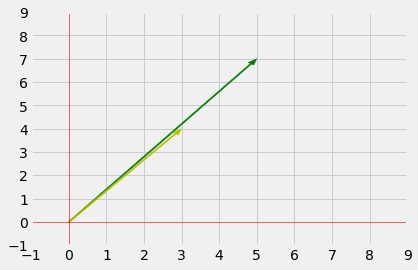

In [0]:
a = np.array([5, 7])
b = np.array([3, 4])

plt.style.use('fivethirtyeight')

plt.arrow(0, 0, dx = a[0], dy = a[1],
          width=.04,
          length_includes_head=True,
          head_width=.18,
          color='g')

plt.arrow(0, 0, dx = b[0], dy = b[1],
          width=.04,
          length_includes_head=True,
          head_width=.18,
          color='y')


plt.xticks(range(-1, 10))
plt.yticks(range(-1, 10))
plt.axhline(y=0, color='r', linewidth=.5)
plt.axvline(x=0, color='r', linewidth=.5);

## 1.5 find $\vec{a} - \vec{b}$ and plot the result on the same graph as $\vec{a}$ and $\vec{b}$. Is there a relationship between vectors $\vec{a} \thinspace, \vec{b} \thinspace \text{and} \thinspace \vec{a-b}$

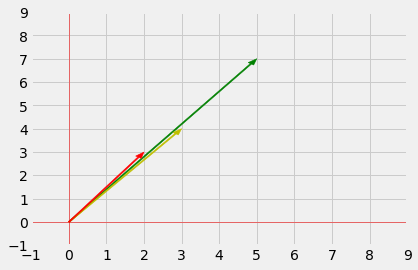

In [0]:
a_minus_b = a - b

plt.style.use('fivethirtyeight')

plt.arrow(0, 0, dx = a[0], dy = a[1],
          width=.04,
          length_includes_head=True,
          head_width=.18,
          color='g')

plt.arrow(0, 0, dx = b[0], dy = b[1],
          width=.04,
          length_includes_head=True,
          head_width=.18,
          color='y')

plt.arrow(0, 0, dx = a_minus_b[0], dy = a_minus_b[1],
          width=.04,
          length_includes_head=True,
          head_width=.18,
          color='r')


plt.xticks(range(-1, 10))
plt.yticks(range(-1, 10))
plt.axhline(y=0, color='r', linewidth=.5)
plt.axvline(x=0, color='r', linewidth=.5);

## 1.6 Find $c \cdot d$

\begin{align}
\vec{c} = \begin{bmatrix}7 & 22 & 4 & 16\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}12 & 6 & 2 & 9\end{bmatrix}
\end{align}


In [0]:
c = np.array([7, 22, 4, 16])
d = np.array([12, 6, 2, 9])

c_dot_d = np.dot(c, d)
c_dot_d

368

##  1.7 Find $e \times f$

\begin{align}
\vec{e} = \begin{bmatrix} 5 \\ 7 \\ 2 \end{bmatrix}
\qquad
\vec{f} = \begin{bmatrix} 3 \\4 \\ 6 \end{bmatrix}
\end{align}

In [0]:
e = np.array([5, 7, 2])
f = np.array([3, 4, 6])
print(np.cross(e, f))

[ 34 -24  -1]


## 1.8 Find $||g||$ and then find $||h||$. Which is longer?

\begin{align}
\vec{g} = \begin{bmatrix} 1 \\ 1 \\ 1 \\ 8 \end{bmatrix}
\qquad
\vec{h} = \begin{bmatrix} 3 \\3 \\ 3 \\ 3 \end{bmatrix}
\end{align}

In [0]:
g = np.array([1, 1, 1, 8])
h = np.array([3, 3, 3, 3])
print(f'The norm of g is: {np.linalg.norm(g)}')
print(f'The norm of h is: {np.linalg.norm(h)}')
print('The norm of g is longer')

The norm of g is: 8.18535277187245
The norm of h is: 6.0
The norm of g is longer


## 1.9 Show that the following vectors are orthogonal (perpendicular to each other):

\begin{align}
\vec{i} = \begin{bmatrix} 1 \\ 0 \\ -1  \end{bmatrix}
\qquad
\vec{j} = \begin{bmatrix} 1 \\ \sqrt{2} \\ 1 \end{bmatrix}
\end{align}

In [0]:
i = np.array([1, 0, -1])
j = np.array([1, np.sqrt(2), 1])
print(f'''If the dot product of 2 vectors is 0, they are orthogonal.
The dot product of i and j is: {np.dot(i, j)}''')

If the dot product of 2 vectors is 0, they are orthogonal.
The dot product of i and j is: 0.0


# Part 2 - Matrices

## 2.1 What are the dimensions of the following matrices? Which of the following can be multiplied together? See if you can find all of the different legal combinations.
\begin{align}
A = \begin{bmatrix}
1 & 2 \\
3 & 4 \\
5 & 6
\end{bmatrix}
\qquad
B = \begin{bmatrix}
2 & 4 & 6 \\
\end{bmatrix}
\qquad
C = \begin{bmatrix}
9 & 6 & 3 \\
4 & 7 & 11
\end{bmatrix}
\qquad
D = \begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
\qquad
E = \begin{bmatrix}
1 & 3 \\
5 & 7
\end{bmatrix}
\end{align}

In [0]:
A = np.array([[1, 2], [3, 4], [5, 6]])
B = np.array([[2, 4, 6]])
C = np.array([[9, 6, 3], [4, 7, 11]])
D = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
E = np.array([[1, 3], [5, 7]])
mat_shape = {'A': A.shape, 'B': B.shape, 'C': C.shape, 'D': D.shape, 'E': E.shape}
for key, value in mat_shape.items():
  print(f'The shape of {key} is {value}')
  
for key, value in mat_shape.items():
  for nextkey, nextvalue in mat_shape.items():
      if value[1] == nextvalue[0]:
        print(f'Matrix {key} can be multiplied with matrix {nextkey}')

The shape of A is (3, 2)
The shape of B is (1, 3)
The shape of C is (2, 3)
The shape of D is (3, 3)
The shape of E is (2, 2)
Matrix A can be multiplied with matrix C
Matrix A can be multiplied with matrix E
Matrix B can be multiplied with matrix A
Matrix B can be multiplied with matrix D
Matrix C can be multiplied with matrix A
Matrix C can be multiplied with matrix D
Matrix D can be multiplied with matrix A
Matrix D can be multiplied with matrix D
Matrix E can be multiplied with matrix C
Matrix E can be multiplied with matrix E


## 2.2 Find the following products: CD, AE, and BA. What are the dimensions of the resulting matrices? How does that relate to the dimensions of their factor matrices?

In [0]:
CD = np.matmul(C, D)
print(CD.shape)
AE = np.matmul(A, E)
print(AE.shape)
BA = np.matmul(B, A)
print(BA.shape)
print('''The shape of the result is equal to the rows of the
first matrix by the columns of the second matrix''')

(2, 3)
(3, 2)
(1, 2)
The shape of the result is equal to the rows of the
first matrix by the columns of the second matrix


## 2.3  Find $F^{T}$. How are the numbers along the main diagonal (top left to bottom right) of the original matrix and its transpose related? What are the dimensions of $F$? What are the dimensions of $F^{T}$?

\begin{align}
F = 
\begin{bmatrix}
20 & 19 & 18 & 17 \\
16 & 15 & 14 & 13 \\
12 & 11 & 10 & 9 \\
8 & 7 & 6 & 5 \\
4 & 3 & 2 & 1
\end{bmatrix}
\end{align}

In [0]:
F = np.array([[20, 19, 18, 17],
              [16, 15, 14, 13],
              [12, 11, 10, 9],
              [8, 7, 6, 5],
              [4, 3, 2, 1]])
print(f'{F} \n\n {F.T} \n\n All of the number are mirrored across the main diagonal')


[[20 19 18 17]
 [16 15 14 13]
 [12 11 10  9]
 [ 8  7  6  5]
 [ 4  3  2  1]] 

 [[20 16 12  8  4]
 [19 15 11  7  3]
 [18 14 10  6  2]
 [17 13  9  5  1]] 

 All of the number are mirrored across the main diagonal


# Part 3 - Square Matrices

## 3.1 Find $IG$ (be sure to show your work) 😃

\begin{align}
G= 
\begin{bmatrix}
12 & 11 \\
7 & 10 
\end{bmatrix}
\end{align}

In [0]:
G = np.array([[12, 11], [7, 10]])
G_I = np.linalg.inv(G)
print(G_I)
G_determinant = G[0][0] * G[1][1] - G[0][1] * G[1][0]
G_I = 1/G_determinant * np.array([[10, -11], [-7, 12]])
print('')
print(G_I)

[[ 0.23255814 -0.25581395]
 [-0.1627907   0.27906977]]

[[ 0.23255814 -0.25581395]
 [-0.1627907   0.27906977]]


## 3.2 Find $|H|$ and then find $|J|$.

\begin{align}
H= 
\begin{bmatrix}
12 & 11 \\
7 & 10 
\end{bmatrix}
\qquad
J= 
\begin{bmatrix}
0 & 1 & 2 \\
7 & 10 & 4 \\
3 & 2 & 0
\end{bmatrix}
\end{align}


In [0]:
H = np.array([[12, 11], [7, 10]])
J = np.array([[0, 1, 2], [7, 10, 4], [3, 2, 0]])
print(np.linalg.det(H))
print(np.linalg.det(J))

43.000000000000014
-19.999999999999996


## 3.3 Find H^{-1} and then find J^{-1}

In [0]:
H_I = np.linalg.inv(H)
J_I = np.linalg.inv(J)
print(f'{H_I} \n\n {J_I}')

[[ 0.23255814 -0.25581395]
 [-0.1627907   0.27906977]] 

 [[ 0.4  -0.2   0.8 ]
 [-0.6   0.3  -0.7 ]
 [ 0.8  -0.15  0.35]]


## 3.4 Find $HH^{-1}$ and then find $G^{-1}G$. Is $HH^{-1} == G^{-1}G$? Why or Why not?

In [0]:
HH_I = np.matmul(H, H_I).round(2)
G_IG = np.matmul(G_I, G).round(2)
print(f'{HH_I}\n\n{G_IG}')

print('\n They are the same, if you multiply a a matrix by it\'s inverse \n you get an Identity Matrix')
np.allclose(G_IG, HH_I)

[[1. 0.]
 [0. 1.]]

[[ 1.  0.]
 [-0.  1.]]

 They are the same, if you multiply a a matrix by it's inverse 
 you get an Identity Matrix


True

# Stretch Goals: 

A reminder that these challenges are optional. If you finish your work quickly we welcome you to work on them. If there are other activities that you feel like will help your understanding of the above topics more, feel free to work on that. Topics from the Stretch Goals sections will never end up on Sprint Challenges. You don't have to do these in order, you don't have to do all of them. 

- Write a function that can calculate the dot product of any two vectors of equal length that are passed to it.
- Write a function that can calculate the norm of any vector
- Prove to yourself again that the vectors in 1.9 are orthogonal by graphing them. 
- Research how to plot a 3d graph with animations so that you can make the graph rotate (this will be easier in a local notebook than in google colab)
- Create and plot a matrix on a 2d graph.
- Create and plot a matrix on a 3d graph.
- Plot two vectors that are not collinear on a 2d graph. Calculate the determinant of the 2x2 matrix that these vectors form. How does this determinant relate to the graphical interpretation of the vectors?



In [0]:
def dot_vector(v1, v2):
  if len(v1) == len(v2):
     return np.dot(v1, v2)
  else:
    return 'ERROR: Vector length unequal'

In [0]:
vector1 = np.array([1, 2, 4, 5])
vector2 = np.array([4, 6, 2, 1])
vector3 = np.array([1, 2, 4, 5, 2])

In [0]:
print(dot_vector(vector1, vector2))
dot_vector(vector1, vector3)

29


'ERROR: Vector length unequal'

In [0]:
def vector_norm(vector):
  sum = 0
  for n in vector:
    sum += n ** 2
  return sum ** .5
  

In [0]:
vector_norm(vector1)

6.782329983125268

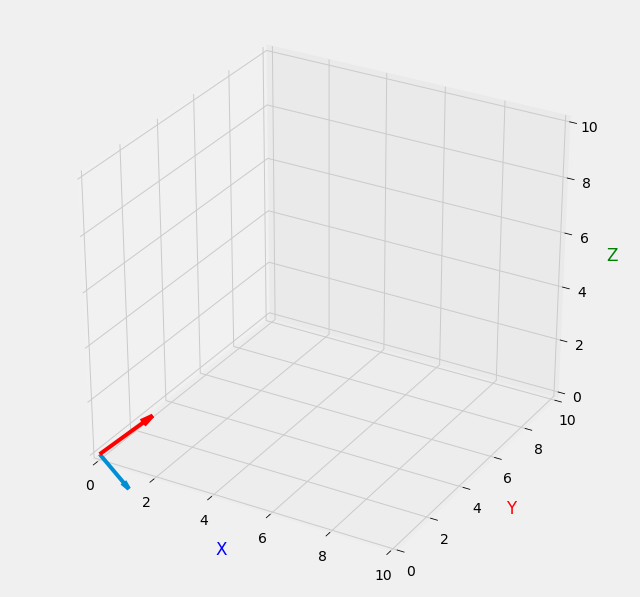

In [0]:
i = np.array([1, 0, -1])
j = np.array([1, np.sqrt(2), 1])

plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, i[0], i[1], i[2], arrow_length_ratio=.2)
ax.quiver(0, 0, 0, j[0], j[1], j[2], arrow_length_ratio=.2, color = 'red')
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
ax.set_zlim([0, 10])
ax.set_xlabel('X', labelpad=10, color='b')
ax.set_ylabel('Y', labelpad=10, color='r')
ax.set_zlabel('Z', labelpad=10, color='g')
plt.show()